In [45]:
import pandas as pd
import numpy as np
import sqlite3

In [46]:
# twm_accounts = pd.read_csv('data/clean/twm_accounts.csv')
# twm_customer = pd.read_csv('data/clean/twm_customer.csv')
# twm_transactions = pd.read_csv('data/clean/twm_transactions.csv')
# twm_checking_acct = pd.read_csv('data/clean/twm_checking_acct.csv')
# twm_checking_tran = pd.read_csv('data/clean/twm_checking_tran.csv')
# twm_credit_acct = pd.read_csv('data/clean/twm_credit_acct.csv')
# twm_credit_tran = pd.read_csv('data/clean/twm_credit_tran.csv')
# twm_savings_acct = pd.read_csv('data/clean/twm_savings_acct.csv')
# twm_savings_tran = pd.read_csv('data/clean/twm_savings_tran.csv')

In [235]:
def dummy_var_create(df, column_name):
    for name in set(df[column_name]):
        if str(name).strip() != "" and name != None:
            df[f"{column_name}_dummy_{name}"] = (df[column_name] == name).astype(int)


# twm_transactions2 = pd.DataFrame(twm_transactions)


In [236]:
# dummy_var_create(twm_accounts, "acct_type")
# dummy_var_create(twm_accounts, "account_active")
# dummy_var_create(twm_transactions, "channel")
# dummy_var_create(twm_transactions, "tran_code")
#
#


In [407]:
sql_query = """
SELECT cust_id, acct_nbr, tran_id, acct_type, nbr_of_accts,nbr_of_trans,acct_active,acct_start_date,acct_end_date,
        tran_date, AVG(tran_amt) AS avg_tran_amt,
       starting_balance as acct_initial_balance,ending_balance as acct_final_balance
           FROM
twm_transactions
INNER JOIN
(
SELECT twm_accounts.cust_id,
       twm_accounts.acct_nbr as __acct_nbr,
       nbr_of_accts,
       nbr_of_trans,
       acct_type,
       CASE
           WHEN account_active = "N" THEN 0
           ELSE 1
           END                           AS acct_active,
       starting_balance,
       ending_balance,
       ending_balance - starting_balance AS delta_balance,
       acct_start_date,
       CASE
           WHEN acct_end_date IS TRUE THEN acct_end_date
           ELSE '1996-01-01'
           END                           AS acct_end_date

FROM twm_accounts
         INNER JOIN (SELECT cust_id                     as me_cust_id,
                            COUNT(twm_accounts.cust_id) AS nbr_of_accts
                     FROM twm_accounts
                     GROUP BY me_cust_id)
                    ON twm_accounts.cust_id = me_cust_id

         INNER JOIN (SELECT acct_nbr        as _acct_nbr,
                            COUNT(acct_nbr) AS nbr_of_trans
                     FROM twm_transactions
                     GROUP BY _acct_nbr)
                    ON twm_accounts.acct_nbr = _acct_nbr )


ON twm_transactions.acct_nbr = __acct_nbr
GROUP BY cust_id, acct_type
ORDER BY cust_id, __acct_nbr;
"""

In [408]:
with sqlite3.connect("data/twm.db") as conn:
    twm_data = pd.read_sql(sql_query,con=conn)
    twm_data.acct_nbr = twm_data.acct_nbr.astype(int)

In [409]:
twm_data2 = pd.DataFrame(twm_data)
# twm_data2['acct_start_date'] = pd.to_datetime(twm_data2['acct_start_date'])
# twm_data2['acct_end_date'] = pd.to_datetime(twm_data2['acct_end_date'])
# twm_data2['tran_date'] = pd.to_datetime(twm_data['tran_date'])

twm_data2['acct_start_date'].to_timestamp()

TypeError: unsupported Type RangeIndex

In [412]:
dummy_var_create(twm_data2, "acct_type")
# dummy_var_create(twm_data2, "channel")
# dummy_var_create(twm_data2, "tran_code")

In [413]:
twm_data2.columns

Index(['cust_id', 'acct_nbr', 'tran_id', 'acct_type', 'nbr_of_accts',
       'nbr_of_trans', 'acct_active', 'acct_start_date', 'acct_end_date',
       'tran_date', 'avg_tran_amt', 'acct_initial_balance',
       'acct_final_balance', 'acct_type_dummy_SV', 'acct_type_dummy_CK',
       'acct_type_dummy_CC'],
      dtype='object')

In [420]:
# columns for if each customer has a certain account type
twm_data2['has_CC'] = twm_data2['acct_type_dummy_CC']
twm_data2['has_CK'] = twm_data2['acct_type_dummy_CK']
twm_data2['has_SV'] = twm_data2['acct_type_dummy_SV']

# columns for start and end date of account by type
twm_data2['acct_start_date_CC'] = twm_data2['acct_start_date'] * twm_data2['acct_type_dummy_CC']
twm_data2['acct_end_date_CC'] = twm_data2['acct_end_date'] * twm_data2['acct_type_dummy_CC']
twm_data2['acct_start_date_CK'] = twm_data2['acct_start_date'] * twm_data2['acct_type_dummy_CK']
twm_data2['acct_end_date_CK'] = twm_data2['acct_end_date'] * twm_data2['acct_type_dummy_CK']
twm_data2['acct_start_date_SV'] = twm_data2['acct_start_date'] * twm_data2['acct_type_dummy_SV']
twm_data2['acct_end_date_SV'] = twm_data2['acct_end_date'] * twm_data2['acct_type_dummy_SV']

twm_data2['acct_term_CC'] = ((pd.to_datetime(twm_data2['acct_end_date']) - pd.to_datetime(twm_data2['acct_start_date'])) * twm_data2['acct_type_dummy_CC'])
twm_data2['acct_term_CC'] =

twm_data2['acct_term_CK'] = ((pd.to_datetime(twm_data2['acct_end_date']) - pd.to_datetime(twm_data2['acct_start_date'])) * twm_data2['acct_type_dummy_CK'])


twm_data2['acct_term_SV'] = ((pd.to_datetime(twm_data2['acct_end_date']) - pd.to_datetime(twm_data2['acct_start_date'])) * twm_data2['acct_type_dummy_SV'])


# columns for avg tran amt by account type
twm_data2['avg_tran_amt_CC'] = twm_data['avg_tran_amt'] * twm_data2['acct_type_dummy_CC']
twm_data2['avg_tran_amt_CK'] = twm_data['avg_tran_amt'] * twm_data2['acct_type_dummy_CK']
twm_data2['avg_tran_amt_SV'] = twm_data['avg_tran_amt'] * twm_data2['acct_type_dummy_SV']

# columns for number of transactions by acct type
twm_data2['nbr_of_tran_CC'] = twm_data['nbr_of_trans'] * twm_data2['acct_type_dummy_CC']
twm_data2['nbr_of_tran_CK'] = twm_data['nbr_of_trans'] * twm_data2['acct_type_dummy_CK']
twm_data2['nbr_of_tran_SV'] = twm_data['nbr_of_trans'] * twm_data2['acct_type_dummy_SV']

# new columns for initial and final bank balance by account type
twm_data2['acct_initial_balance_CC'] = twm_data['acct_initial_balance'] * twm_data2['acct_type_dummy_CC']
twm_data2['acct_final_balance_CC'] = twm_data['acct_final_balance'] * twm_data2['acct_type_dummy_CC']

twm_data2['acct_initial_balance_CK'] = twm_data['acct_initial_balance'] * twm_data2['acct_type_dummy_CK']
twm_data2['acct_final_balance_CK'] = twm_data['acct_final_balance'] * twm_data2['acct_type_dummy_CK']

twm_data2['acct_initial_balance_SV'] = twm_data['acct_initial_balance'] * twm_data2['acct_type_dummy_SV']
twm_data2['acct_final_balance_SV'] = twm_data['acct_final_balance'] * twm_data2['acct_type_dummy_SV']


twm_data2.columns

AttributeError: 'Series' object has no attribute 'days'

In [416]:
twm_data3 = pd.DataFrame(twm_data2)
x = twm_data3.groupby('cust_id')[ 'has_CC', 'has_CK', 'has_SV',
                                  'acct_start_date_CC', 'acct_end_date_CC',
                                  'acct_start_date_CK', 'acct_end_date_CK',
                                  'acct_start_date_SV', 'acct_end_date_SV',
                                  'acct_term_CC', 'acct_term_CK', 'acct_term_SV',
                                  'avg_tran_amt_CC', 'avg_tran_amt_CK', 'avg_tran_amt_SV',
                                  'nbr_of_tran_CC','nbr_of_tran_CK', 'nbr_of_tran_SV',
                                  'acct_initial_balance_CC', 'acct_final_balance_CC',
                                  'acct_initial_balance_CK','acct_final_balance_CK',
                                  'acct_initial_balance_SV','acct_final_balance_SV'].apply(sum)

dropme = ['acct_nbr','tran_id','acct_type','acct_end_date','tran_date','acct_final_balance']
twm_data3 = twm_data3.drop(columns=dropme)
# for i in dropme:
#     twm_data3 = twm_data3.drop(columns=i)

# twm_data3['cust_id'] = twm_data3['cust_id'].astype(object)

x


C:\Users\thowe\AppData\Local\Temp\ipykernel_38224\1081082948.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = twm_data3.groupby('cust_id')[ 'has_CC', 'has_CK', 'has_SV',


,has_CC,has_CK,has_SV,acct_start_date_CC,acct_end_date_CC,acct_start_date_CK,acct_end_date_CK,acct_start_date_SV,acct_end_date_SV,acct_term_CC,...,avg_tran_amt_SV,nbr_of_tran_CC,nbr_of_tran_CK,nbr_of_tran_SV,acct_initial_balance_CC,acct_final_balance_CC,acct_initial_balance_CK,acct_final_balance_CK,acct_initial_balance_SV,acct_final_balance_SV
cust_id,,,,,,,,,,,,,,,,,,,,,
1362480,1,1,1,1992-12-23,1995-12-15,1992-12-23,1996-01-01,1992-12-23,1996-01-01,1087 days,...,18.550769,32,99,26,1607.40,20.00,331.85,86.86,707.09,1187.97
1362484,1,1,1,1993-01-02,1996-01-01,1993-01-02,1996-01-01,1993-01-02,1996-01-01,1094 days,...,58.474545,55,99,33,1278.78,369.72,2613.46,95.32,194.76,2122.17
1362485,1,1,0,1992-04-13,1996-01-01,1995-09-26,1996-01-01,,,1358 days,...,0.000000,72,99,0,282.38,1100.00,209.78,45.49,0.00,0.00
1362486,0,1,1,,,1994-08-24,1996-01-01,1989-07-13,1996-01-01,0 days,...,-6.729600,0,25,25,0.00,0.00,4252.39,3312.27,284.48,116.24
1362487,1,1,1,1995-08-08,1996-01-01,1995-01-12,1996-01-01,1994-06-27,1995-08-25,146 days,...,-33.623158,32,52,19,0.00,1548.23,2781.07,1401.21,651.73,12.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363490,0,0,1,,,,,1994-11-27,1996-01-01,0 days,...,2.853333,0,0,12,0.00,0.00,0.00,0.00,2267.29,2301.53
1363491,0,0,1,,,,,1990-10-22,1995-04-19,0 days,...,-10.423889,0,0,18,0.00,0.00,0.00,0.00,205.45,17.82
1363492,1,1,1,1991-12-31,1996-01-01,1991-12-31,1996-01-01,1991-12-31,1996-01-01,1462 days,...,6.563200,29,99,25,4128.58,6869.00,1350.61,106.14,952.38,1116.10


In [395]:
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# create an Agglomerative Clustering object
ac = AgglomerativeClustering(affinity ='euclidean',
                             linkage='ward',
                             n_clusters=5)

hc = ac.fit_predict(twm_data3)

ValueError: could not convert string to float: '1992-12-23'

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\thowe\miniconda3\envs\LighthouseEnv

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.4.2           |  py310hd77b12b_0          58 KB
    libtiff-4.2.0              |       he0120a3_1         754 KB
    matplotlib-3.5.1           |  py310haa95532_1          29 KB
    matplotlib-base-3.5.1      |  py310hd77b12b_1         5.6 MB
    pillow-9.2.0               |  py310hdc2b20a_1         915 KB
    pyqt-5.9.2                 |  py310hd77b12b_6         3.3 MB
    sip-4.19.13                |  py310hd77b12b_0         262 KB
    zstd-1.5.2                 |       h19a0ad4_0         509 KB
    ------------------------------------------------------------
                                           Total:        11.5 MB

The following NEW packages wil

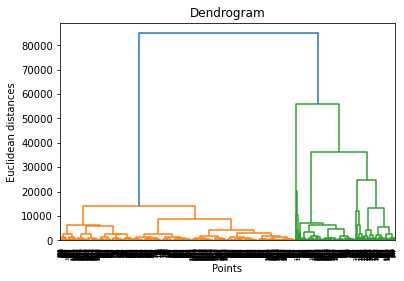

In [325]:
# define plot_dendrogram function
import matplotlib.pyplot as plt
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

plot_dendrogram(twm_data3)